In [86]:
import numpy as np
import pandas as pd
import yfinance as yf

import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [87]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


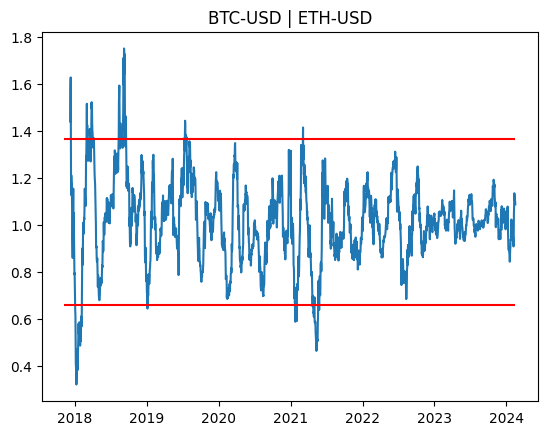

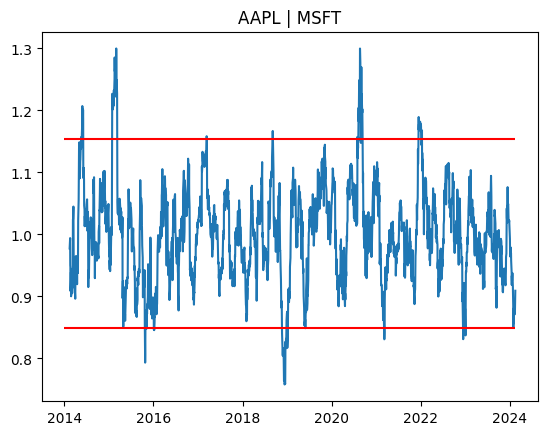

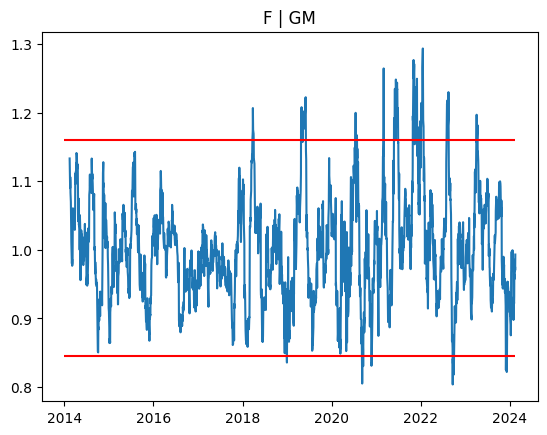

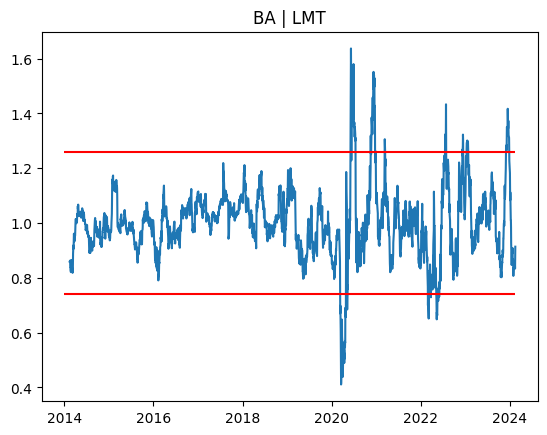

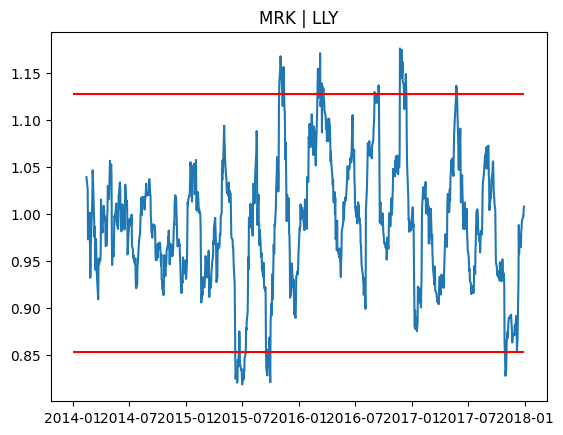

In [90]:
import common.util as util
import matplotlib.pyplot as plt

pairs = [
    ['BTC-USD', 'ETH-USD', None],
    ['AAPL', 'MSFT', ['2012-01-01', None]],
    ['F', 'GM', None],
    ['BA', 'LMT', None],
    ['MRK', 'LLY', ['2007-01-01', '2018-01-01']],
]

for pair in pairs:
    df_1 = yf.Ticker(pair[0]).history(start='2014-01-01', end=None)
    df_2 = yf.Ticker(pair[1]).history(start='2014-01-01', end=None)
    df_1.index = pd.DatetimeIndex(df_1.index)
    df_2.index = pd.DatetimeIndex(df_2.index)

    pair_df = df_1.join(df_2, lsuffix='_x', rsuffix='_y').dropna()
    pair_df.index = pair_df.index.tz_localize(None).astype('datetime64[ns]')
    if pair[2] != None:
        if pair[2][0] != None:
            pair_df = pair_df[pair_df.index > np.datetime64(pair[2][0])]
        if pair[2][1] != None:
            pair_df = pair_df[pair_df.index < np.datetime64(pair[2][1])]

    pair_df['Ratio'] = util.norm_pairs(pair_df, 'Close_x', 'Close_y').dropna().copy()
    pair_df['Outlier'] = util.flag_outliers(pair_df, 'Ratio', 2).copy()

    l1 = pair_df['Ratio'].mean()-2*pair_df['Ratio'].std()
    l2 = pair_df['Ratio'].mean()+2*pair_df['Ratio'].std()
    plt.plot(pair_df.index.values, pair_df['Ratio'])
    plt.hlines(l1, xmin=pair_df.index.values[0], xmax=pair_df.index.values[-1], colors='#ff0000')
    plt.hlines(l2, xmin=pair_df.index.values[0], xmax=pair_df.index.values[-1], colors='#ff0000')
    plt.title(f"{pair[0]} | {pair[1]}")
    plt.show()